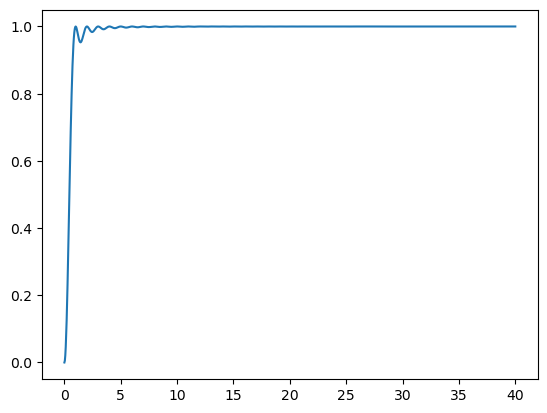

In [1]:
import numpy as np
import matplotlib.pyplot as plt
r = np.linspace(0.0001, 40, 1001)
gr_fermonic = 1 - np.sin(np.pi*r)**2/(np.pi*r)**2
plt.plot(r, gr_fermonic)

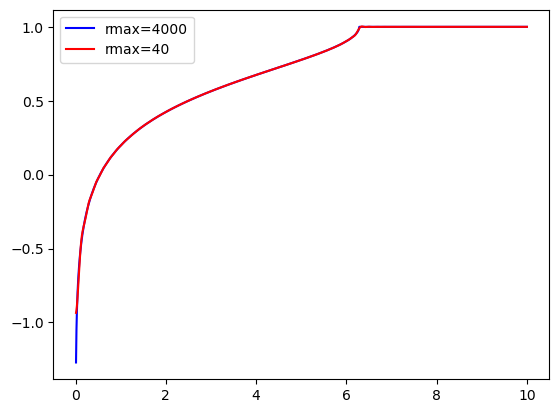

In [3]:
from scipy.special import j0
def hankel_transform_2d(gr, r, k_values):
    hk = np.zeros(len(k_values))
    delta_r = np.diff(r)[0]
    for i in range(len(k_values)):
        integrand = r*(gr-1)*j0(k_values[i]*r)
        hk[i] = 2*np.pi*np.trapezoid(integrand, r, dx=delta_r)
    return 1+hk
r = np.linspace(0.0001, 4000, 100001)
gr_fermonic = 1 - np.sin(np.pi*r)**2/(np.pi*r)**2
k_values = np.linspace(0.01, 10, 2000)
sk1 = hankel_transform_2d(gr_fermonic, r, k_values)
plt.plot(k_values, sk1, label="rmax=4000", color='blue')

r = np.linspace(0.0001, 40, 1001)
gr_fermonic = 1 - np.sin(np.pi*r)**2/(np.pi*r)**2
sk2 = hankel_transform_2d(gr_fermonic, r, k_values)
plt.plot(k_values, sk2, label="rmax=40", color='red')

plt.legend()

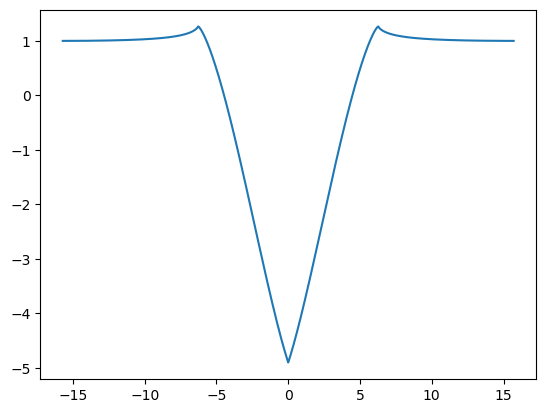

In [49]:
def Fourier_transform_2d(gr):
    # Subtract 1 to obtain h(r) from g(r)
    hr = gr - 1
    h_r_neg = hr[::-1]      # Mirror the h(r) data

    h_r_full = np.concatenate((h_r_neg, hr))

    # Compute the 1D Fourier transform
    hk = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(h_r_full)))

    Sk = 1 + np.real(hk)

    return Sk

r = np.linspace(0.01, 200000, 1000001)
gr_fermonic = 1 - np.sin(np.pi*r)**2/(np.pi*r)**2
# Calculate wavevector values k based on Fourier modes
r_neg = -r[::-1]         # Negative radial coordinates
r_full = np.concatenate((r_neg, r))
N = len(r_full)
k_values = 2 * np.pi * np.fft.fftshift(np.fft.fftfreq(N, d=(r[1] - r[0])))
sk = Fourier_transform_2d(gr_fermonic)
plt.plot(k_values, sk)